In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from scripts import used_functions

In [2]:
df = pd.read_pickle("../../data/raw/AtliQ_sales_LATAM.pkl")
df.head()

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
0,Amazon,E-Commerce,Retailer,Brazil,2017-09-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,61.58
1,Atliq e Store,E-Commerce,Direct,Brazil,2017-10-01,5,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,76.98
2,Atliq e Store,E-Commerce,Direct,Brazil,2017-11-01,5,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,76.98
3,Amazon,E-Commerce,Retailer,Brazil,2017-11-01,16,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,246.32
4,Atliq e Store,E-Commerce,Direct,Brazil,2017-12-01,3,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,46.19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39294 entries, 0 to 39293
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           39294 non-null  object 
 1   platform           39294 non-null  object 
 2   channel            39294 non-null  object 
 3   market             39294 non-null  object 
 4   date               39294 non-null  object 
 5   sold_quantity      39294 non-null  int64  
 6   division           39294 non-null  object 
 7   segment            39294 non-null  object 
 8   category           39294 non-null  object 
 9   product            39294 non-null  object 
 10  variant            39294 non-null  object 
 11  total_gross_sales  39294 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 3.6+ MB


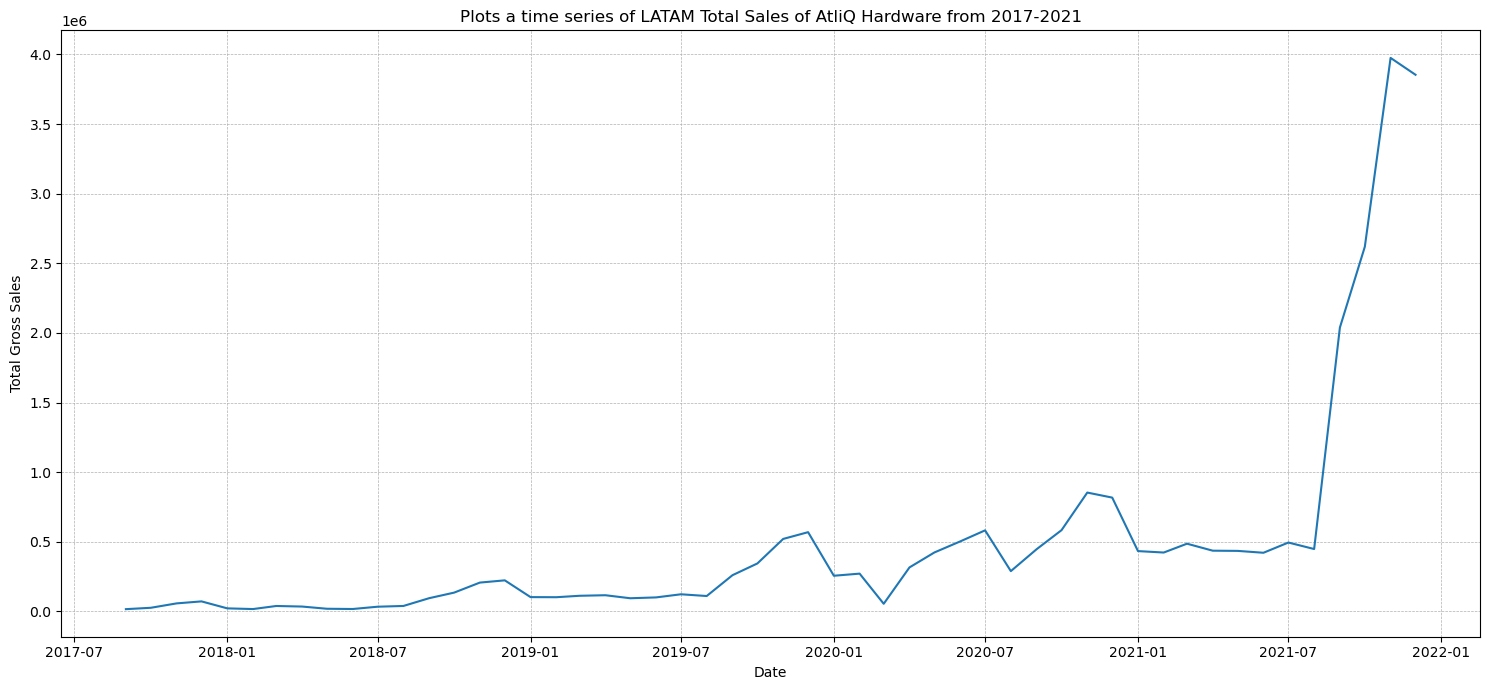

In [4]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
# Aggregating the data
time_series_data = df.groupby('date')['total_gross_sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 7))
sns.lineplot(data=time_series_data, x='date', y='total_gross_sales')
plt.title('Plots a time series of LATAM Total Sales of AtliQ Hardware from 2017-2021')
plt.xlabel("Date")
plt.ylabel("Total Gross Sales")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

Wow, these guys growed in a exponential way, isn't it??

### Análisis de Ventas con Promedio Móvil
El gráfico a continuación muestra las ventas totales a lo largo del tiempo, junto con un promedio móvil de 6 meses. Este promedio móvil ayuda a suavizar las fluctuaciones y revela tendencias subyacentes en los datos.

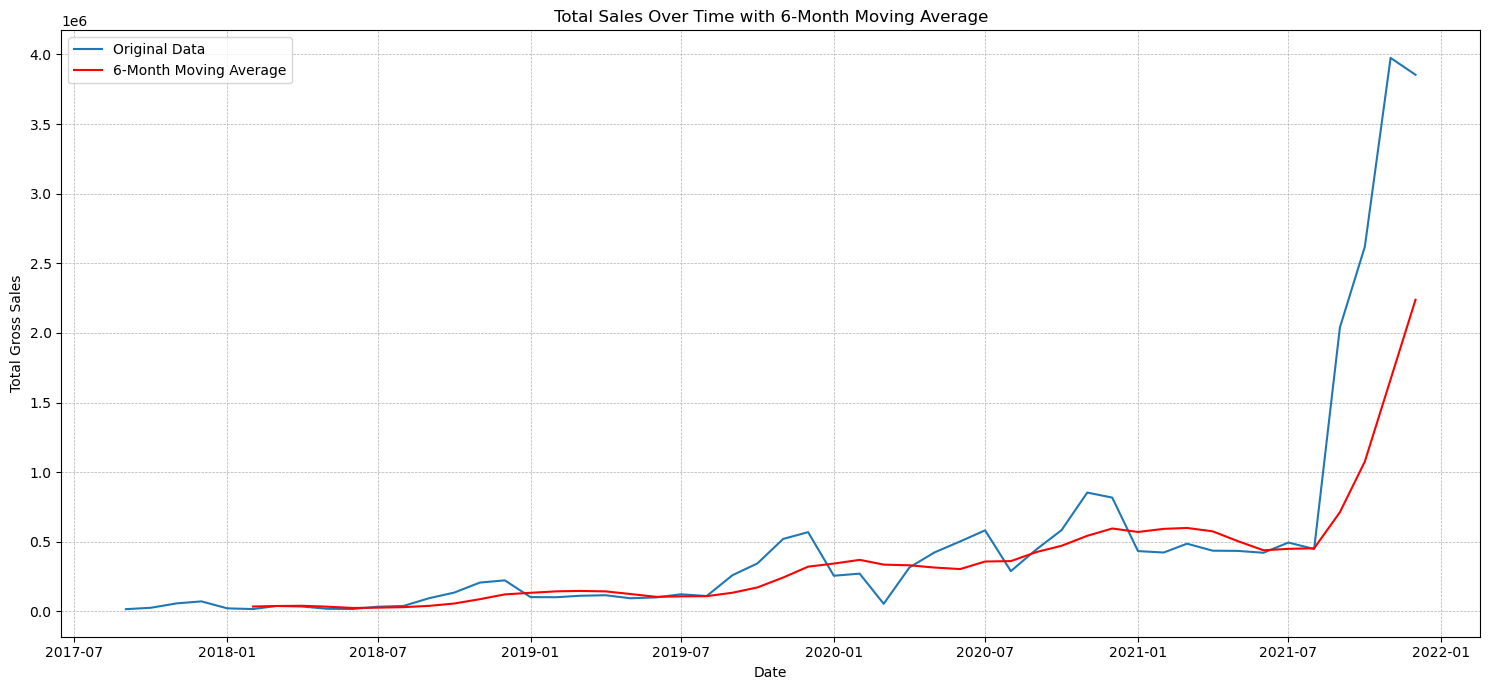

In [5]:
time_series_data['6_month_MA'] = time_series_data['total_gross_sales'].rolling(window=6).mean()

# Plotting
plt.figure(figsize=(15, 7))

# Original data
sns.lineplot(data=time_series_data, x='date', y='total_gross_sales', label='Original Data')

# 6-month moving average
sns.lineplot(data=time_series_data, x='date', y='6_month_MA', label='6-Month Moving Average', color='red')

plt.title('Total Sales Over Time with 6-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Gross Sales')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**Observaciones:**  
- Se puede observar un crecimiento aparentemente exponencial en las ventas totales. Esta tendencia sugiere que las ventas han estado aumentando a un ritmo acelerado durante el período representado en los datos.

- El promedio móvil de 6 meses muestra una tendencia clara y menos ruido en comparación con los datos originales, lo que facilita la identificación de patrones y tendencias generales.

El problema es que dejamos de obtener informacion historica a partir de esos ultimos 6 meses, cuando el crecimiento comenzo a ser el punto pivotal de la imagen, 
A que factores se habran debido esas ventas??  

Pues, veamoslo, tenemos demasiados datos para visualizar el crecimiento de las ventas en latinoamerica con cada venta del periodo!!

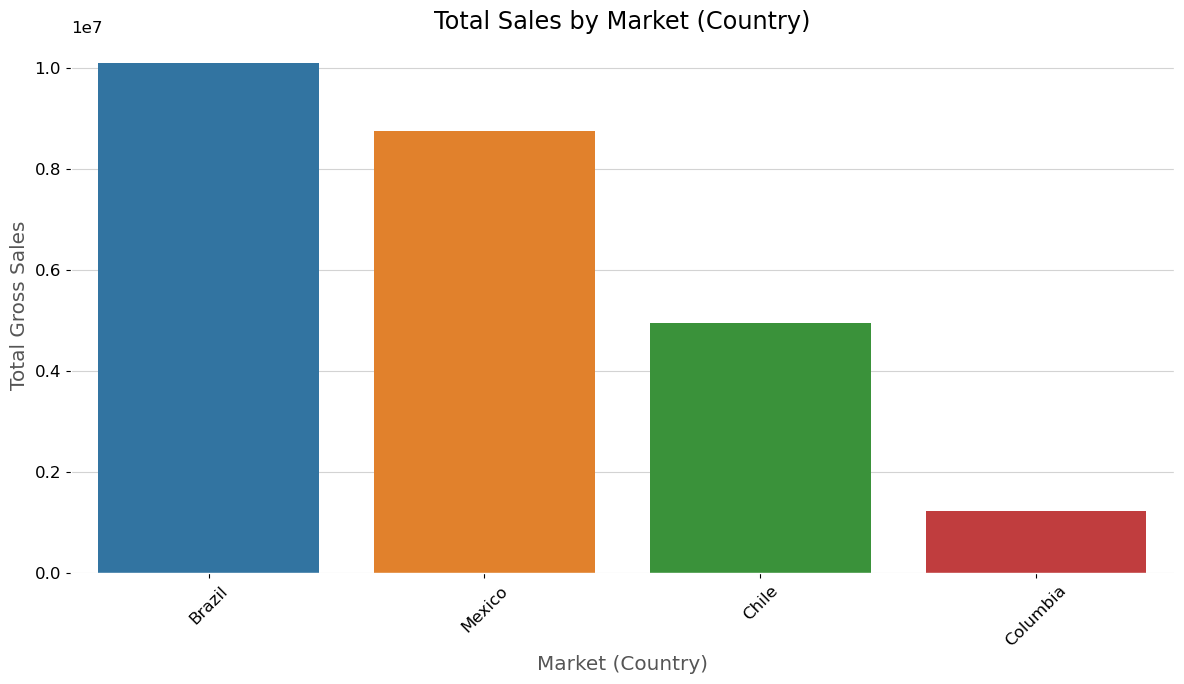

In [6]:

import sys
sys.path.append('..')
from utility import plot_settings

sales_by_market = df.groupby('market')['total_gross_sales'].sum().sort_values(ascending=False)

# Plotting total sales by market
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_by_market.index, y=sales_by_market, palette="tab10")
plt.title('Total Sales by Market (Country)')
plt.xlabel('Market (Country)')
plt.ylabel('Total Gross Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
time_series_data

,date,total_gross_sales,6_month_MA
0,2017-09-01,"16,214.62",NaN
1,2017-10-01,"26,121.67",NaN
2,2017-11-01,"57,625.56",NaN
3,2017-12-01,"72,003.56",NaN
4,2018-01-01,"21,959.61",NaN
...,...,...,...
47,2021-08-01,"448,081.57","453,479.72"
48,2021-09-01,"2,038,839.52","712,245.80"
49,2021-10-01,"2,618,730.98","1,076,019.15"
50,2021-11-01,"3,974,748.66","1,666,034.24"


Good. We have 52 rows to play with the data. I don't know if it's enough, but let's try

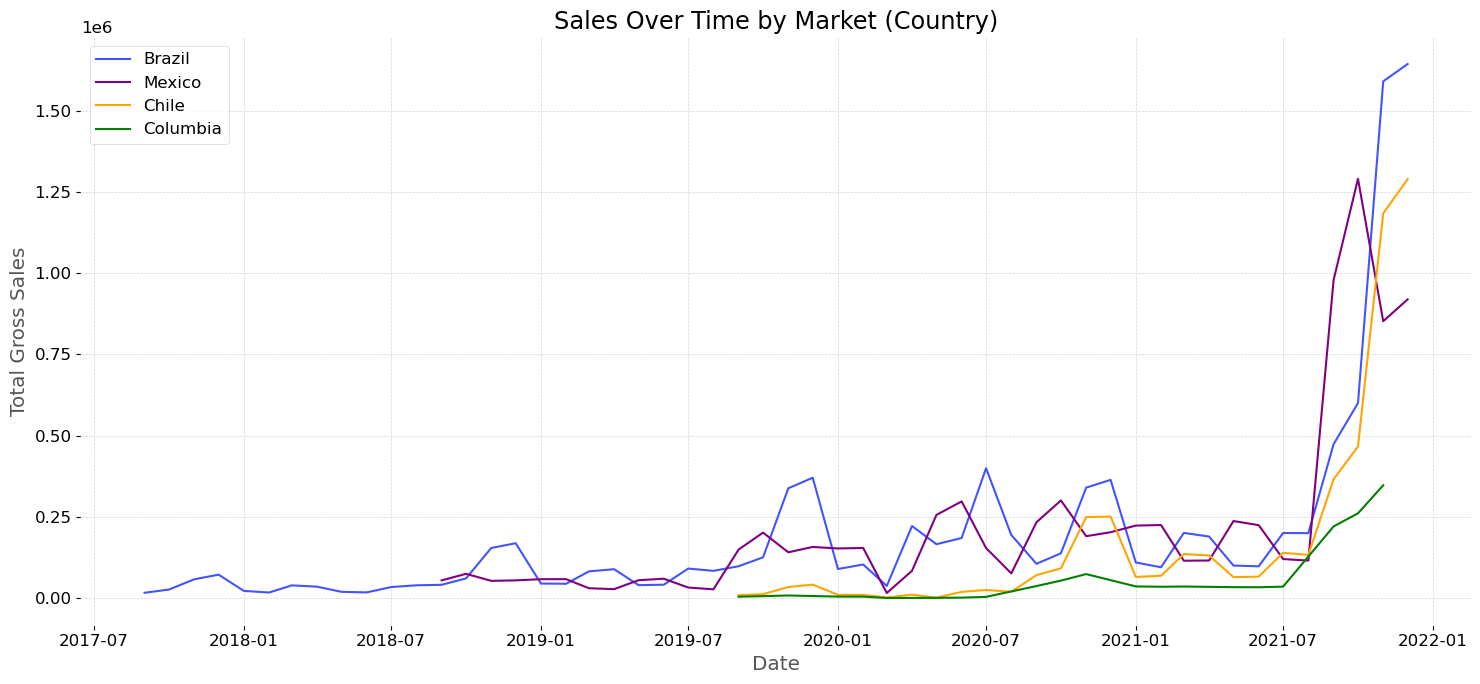

In [8]:

sales_by_date_market = df.groupby(['date', 'market'])['total_gross_sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 7))

# Loop over each market to plot its time series
for market in sales_by_date_market['market'].unique():
    subset = sales_by_date_market[sales_by_date_market['market'] == market]
    plt.plot(subset['date'], subset['total_gross_sales'], label=market)

plt.title('Sales Over Time by Market (Country)')
plt.xlabel('Date')
plt.ylabel('Total Gross Sales')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Bien! Podemos ver que Brasil es la que lleva mas tiempo en el mercado, que Mexico tuvo una caida drastica cerca de Ocutbre-Noviembre / 2021 y que quiza haya tenido un motivo importante, pero la que me interesa analizar es Chile, puesto que es la mas corta en tiempo y con mayor crecimiento exponencial comparada a su longitud en el tiempo:

In [9]:
chile = df.query("market=='Chile'")

In [10]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8755 entries, 55 to 39292
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           8755 non-null   object        
 1   platform           8755 non-null   object        
 2   channel            8755 non-null   object        
 3   market             8755 non-null   object        
 4   date               8755 non-null   datetime64[ns]
 5   sold_quantity      8755 non-null   int64         
 6   division           8755 non-null   object        
 7   segment            8755 non-null   object        
 8   category           8755 non-null   object        
 9   product            8755 non-null   object        
 10  variant            8755 non-null   object        
 11  total_gross_sales  8755 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 889.2+ KB


In [11]:
chile.head()

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
55,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-09-01,1,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,16.23
60,Amazon,E-Commerce,Retailer,Chile,2019-10-01,2,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,32.46
64,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
65,Amazon,E-Commerce,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
71,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-12-01,3,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,48.70


In [12]:
sales_by_date_customer = chile.groupby(['date', 'customer'])['total_gross_sales'].sum().reset_index()

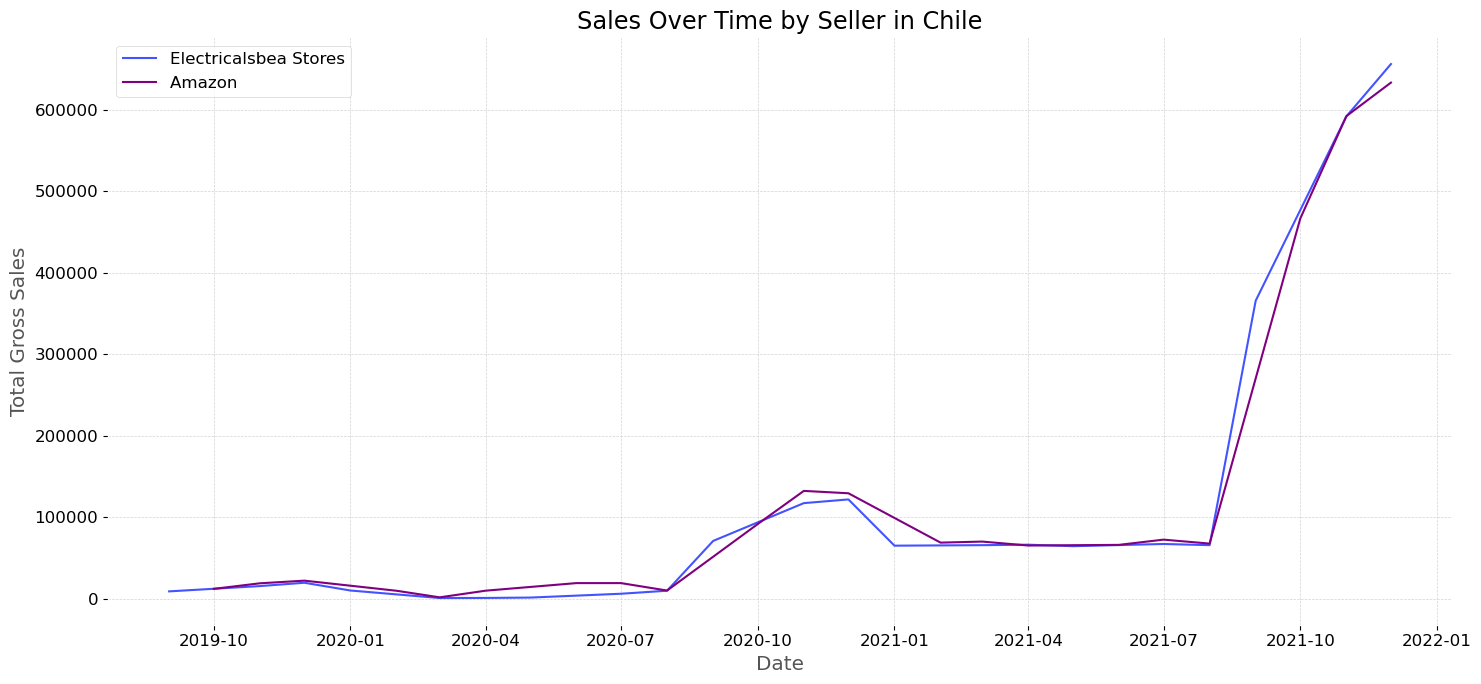

In [13]:
plt.figure(figsize=(15, 7))

# Loop over each customer to plot its time series
for customer in sales_by_date_customer['customer'].unique():
    subset = sales_by_date_customer[sales_by_date_customer['customer'] == customer]
    plt.plot(subset['date'], subset['total_gross_sales'], label=customer)

plt.title('Sales Over Time by Seller in Chile')
plt.xlabel('Date')
plt.ylabel('Total Gross Sales')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Podemos darnos cuenta de algo verdaderamente interesante: La tienda de Atliq e Store ya no se encuentra en Chile, como si lo hizo en Brasil cuando comenzo su mercado:

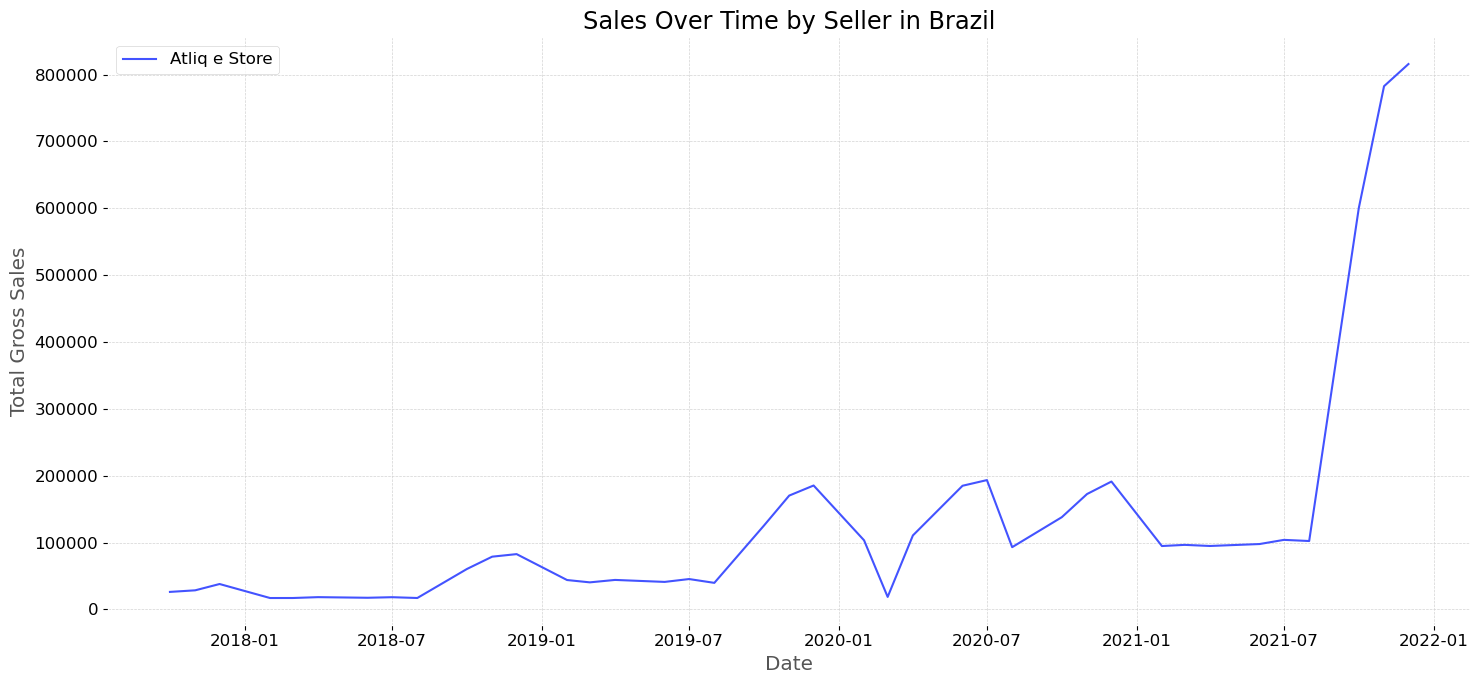

In [14]:


# Filter data for Brazil and the three sellers
brazil = df.query("market == 'Brazil' and customer in ['Amazon', 'Atliq e Store', 'Electricalsbea Stores']")

# Group data by date and customer, then sum the total sales
sales_by_date_customer_brazil = brazil.groupby(['date', 'customer'])['total_gross_sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 7))

# Loop over each customer to plot its time series
for customer in sales_by_date_customer_brazil['customer'].unique():
    subset = sales_by_date_customer_brazil[sales_by_date_customer_brazil['customer'] == customer]
    plt.plot(subset['date'], subset['total_gross_sales'], label=customer)

plt.title('Sales Over Time by Seller in Brazil')
plt.xlabel('Date')
plt.ylabel('Total Gross Sales')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Atliq is the unique customer in Brazil!!:

In [15]:
brazil['market'].value_counts()

market
Brazil    7045
Name: count, dtype: int64

Wow! This is an interesting insight! When Atliq decided to move from being their own customer in Brazil, to Amazon (as the E-commerce company) and Electricalsbea Stores (as their Brick & Mortar), they started to grow faster than the other countries. But, wath was exactly the reason?? We already maked the visualization, and we can see that the platform isn't the reason

In [16]:
chile['channel'].value_counts()

channel
Retailer    8755
Name: count, dtype: int64

So, Atliq has just two platforms in Chile before 2021, and One Customer by each one, being "Electricalsbea Stores" the Brick & Mortar, And Amazon the online one. If we want to visualize the products sorted by the total gross sales, we do:

In [17]:
Chile_Products_byCustomer = chile.sort_values(by='total_gross_sales', ascending=False).drop(['market','channel'], axis='columns')

In [18]:
Chile_Products_byCustomer

,customer,platform,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
8382,Amazon,E-Commerce,2021-12-01,70,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Standard,"13,862.86"
8479,Electricalsbea Stores,Brick & Mortar,2021-11-01,63,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Premium,"13,515.75"
8290,Electricalsbea Stores,Brick & Mortar,2021-11-01,70,P & A,Peripherals,Processors,AQ Electron 4 3600 Desktop Processor,Premium,"13,187.36"
8375,Amazon,E-Commerce,2021-11-01,65,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Standard,"12,872.65"
8480,Amazon,E-Commerce,2021-11-01,58,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Premium,"12,443.07"
...,...,...,...,...,...,...,...,...,...,...
10984,Electricalsbea Stores,Brick & Mortar,2020-05-01,1,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 2,3.51
10975,Electricalsbea Stores,Brick & Mortar,2020-03-01,1,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 2,3.51
10796,Electricalsbea Stores,Brick & Mortar,2020-03-01,1,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 1,2.92
10806,Electricalsbea Stores,Brick & Mortar,2020-05-01,1,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 1,2.92


In [19]:
Chile_Products_byCustomer['customer'].value_counts()

customer
Amazon                   4468
Electricalsbea Stores    4287
Name: count, dtype: int64

In [20]:
# Chile_Products_byCustomer.to_csv('../../data/interim/Chile_Products_byCustomer.csv', index=False)

In [21]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8755 entries, 55 to 39292
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           8755 non-null   object        
 1   platform           8755 non-null   object        
 2   channel            8755 non-null   object        
 3   market             8755 non-null   object        
 4   date               8755 non-null   datetime64[ns]
 5   sold_quantity      8755 non-null   int64         
 6   division           8755 non-null   object        
 7   segment            8755 non-null   object        
 8   category           8755 non-null   object        
 9   product            8755 non-null   object        
 10  variant            8755 non-null   object        
 11  total_gross_sales  8755 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 889.2+ KB


In [22]:
chile.to_csv('../../data/interim/chile.csv', index=False)
pd.to_pickle(chile, '../../data/interim/chile.pkl')